## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE

# # Drop the 'EIN' and 'NAME' columns from application_df
# application_df = application_df.drop(columns=['EIN', 'NAME'])


# ### note errors out if run more than once
# # Drop the 'EIN' and 'NAME' columns in place
# application_df.drop(columns=['EIN', 'NAME'], inplace=True)


# List of columns to drop
columns_to_drop = ['EIN', 'NAME']

# Drop columns only if they exist in the DataFrame  (NOTE: this code can be re-run without erroring out)
application_df.drop(columns=[col for col in columns_to_drop if col in application_df.columns], inplace=True)


In [3]:
application_df.head()


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE


# # Get the number of unique values for each column in application_df
# unique_values_count = application_df.nunique()
# print(unique_values_count)


# # Print the column names along with their unique values count
# for column, unique_count in unique_values_count.items():
#     print(f"Column: {column} - Unique Values: {unique_count}")


# Get the number of unique values for each column in application_df
application_df.nunique()


APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [5]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
#  YOUR CODE GOES HERE

# # Get the unique values and their frequency count for the APPLICATION_TYPE column
# application_type_counts = application_df['APPLICATION_TYPE'].value_counts()
# # Display the result
# print(application_type_counts)

application_df['APPLICATION_TYPE'].value_counts()


APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [6]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
#  YOUR CODE GOES HERE




cutoff = 500

# Get the value counts of APPLICATION_TYPE
application_type_counts = application_df['APPLICATION_TYPE'].value_counts()

# Filter the values that have counts below the cutoff
# low_count_types = application_type_counts[application_type_counts < cutoff].index.tolist()
# print(low_count_types)

# Filter the values that have counts below the cutoff
application_types_to_replace = application_type_counts[application_type_counts < cutoff].index.tolist()
print(application_types_to_replace)


# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

['T9', 'T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17']


APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [7]:
# # Set the maximum number of rows to display
# pd.set_option('display.max_rows', None)


In [8]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
#  YOUR CODE GOES HERE

application_df['CLASSIFICATION'].value_counts()


CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [9]:
# # Reset to the default max rows value (usually 10)
# pd.reset_option('display.max_rows')


In [10]:
# You may find it helpful to look at CLASSIFICATION value counts >1
#  YOUR CODE GOES HERE


# Get the value counts for the 'CLASSIFICATION' column
classification_counts = application_df['CLASSIFICATION'].value_counts()

# Filter the value counts to only display those greater than 1
filtered_counts = classification_counts[classification_counts > 1]

# Display the filtered counts
print(filtered_counts)



CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64


In [11]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
#  YOUR CODE GOES HERE



cutoff = 1000

# Get the value counts of APPLICATION_TYPE
classification_type_counts = application_df['CLASSIFICATION'].value_counts()

# Filter the values that have counts below the cutoff
classifications_to_replace = classification_type_counts[classification_type_counts < cutoff].index.tolist()
print(classifications_to_replace)




# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

['C7000', 'C1700', 'C4000', 'C5000', 'C1270', 'C2700', 'C2800', 'C7100', 'C1300', 'C1280', 'C1230', 'C1400', 'C7200', 'C2300', 'C1240', 'C8000', 'C7120', 'C1500', 'C1800', 'C6000', 'C1250', 'C8200', 'C1238', 'C1278', 'C1235', 'C1237', 'C7210', 'C2400', 'C1720', 'C4100', 'C1257', 'C1600', 'C1260', 'C2710', 'C0', 'C3200', 'C1234', 'C1246', 'C1267', 'C1256', 'C2190', 'C4200', 'C2600', 'C5200', 'C1370', 'C1248', 'C6100', 'C1820', 'C1900', 'C1236', 'C3700', 'C2570', 'C1580', 'C1245', 'C2500', 'C1570', 'C1283', 'C2380', 'C1732', 'C1728', 'C2170', 'C4120', 'C8210', 'C2561', 'C4500', 'C2150']


CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64

In [12]:
# Set Pandas display option to show all columns
pd.set_option('display.max_columns', None)


# before
print("########## BEFORE ##########")
print(application_df.head())


########## BEFORE ##########
  APPLICATION_TYPE       AFFILIATION CLASSIFICATION      USE_CASE  \
0              T10       Independent          C1000    ProductDev   
1               T3       Independent          C2000  Preservation   
2               T5  CompanySponsored          C3000    ProductDev   
3               T3  CompanySponsored          C2000  Preservation   
4               T3       Independent          C1000     Heathcare   

   ORGANIZATION  STATUS     INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  \
0   Association       1              0                      N     5000   
1  Co-operative       1         1-9999                      N   108590   
2   Association       1              0                      N     5000   
3         Trust       1    10000-24999                      N     6692   
4         Trust       1  100000-499999                      N   142590   

   IS_SUCCESSFUL  
0              1  
1              1  
2              0  
3              1  
4              1

In [13]:
# Convert categorical data to numeric with `pd.get_dummies`
#  YOUR CODE GOES HERE



# Convert categorical data to numeric data using pd.get_dummies
application_df = pd.get_dummies(application_df)




In [14]:
#after
print("\n\n########## AFTER ##########")

# Display the first few rows of the new DataFrame to verify the changes
print(application_df.head())


# Reset the display.max_columns option to its default value
pd.reset_option('display.max_columns')




########## AFTER ##########
   STATUS  ASK_AMT  IS_SUCCESSFUL  APPLICATION_TYPE_Other  \
0       1     5000              1                   False   
1       1   108590              1                   False   
2       1     5000              0                   False   
3       1     6692              1                   False   
4       1   142590              1                   False   

   APPLICATION_TYPE_T10  APPLICATION_TYPE_T19  APPLICATION_TYPE_T3  \
0                  True                 False                False   
1                 False                 False                 True   
2                 False                 False                False   
3                 False                 False                 True   
4                 False                 False                 True   

   APPLICATION_TYPE_T4  APPLICATION_TYPE_T5  APPLICATION_TYPE_T6  \
0                False                False                False   
1                False                False   

In [15]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE


# Split the data into features and labels
#
# y - labels - label vector - target variables (dependent variables)
y_labels_df = application_df['IS_SUCCESSFUL']
#
# X - features - feature matrix - input variables (independent variables)
x_features_df = application_df.drop(columns=['IS_SUCCESSFUL'])



# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets

# test_data_percentage = (20/100) ... means 20% of the data will be used for testing, and 80% for training. (FYI: default is 25%)
test_data_percentage = (20/100)
X_train, X_test, y_train, y_test = train_test_split(x_features_df, y_labels_df, test_size=test_data_percentage, random_state=1)


In [16]:

print("y_labels_df\n-----------\n", y_labels_df.head())
print("\nx_features_df\n-------------\n", x_features_df.head())


y_labels_df
-----------
 0    1
1    1
2    0
3    1
4    1
Name: IS_SUCCESSFUL, dtype: int64

x_features_df
-------------
    STATUS  ASK_AMT  APPLICATION_TYPE_Other  APPLICATION_TYPE_T10  \
0       1     5000                   False                  True   
1       1   108590                   False                 False   
2       1     5000                   False                 False   
3       1     6692                   False                 False   
4       1   142590                   False                 False   

   APPLICATION_TYPE_T19  APPLICATION_TYPE_T3  APPLICATION_TYPE_T4  \
0                 False                False                False   
1                 False                 True                False   
2                 False                False                False   
3                 False                 True                False   
4                 False                 True                False   

   APPLICATION_TYPE_T5  APPLICATION_TYPE_T6  APPLICA

In [18]:

print("\nX_train\n-------\n", X_train)
print("\nX_test\n------\n", X_test)
print("\ny_train\n-------\n", y_train)
print("\ny_test\n------\n", y_test)



X_train
-------
        STATUS  ASK_AMT  APPLICATION_TYPE_Other  APPLICATION_TYPE_T10  \
28644       1     5000                   False                 False   
6955        1     5000                   False                 False   
26368       1     5000                   False                 False   
3510        1     5000                   False                 False   
18215       1     5000                   False                 False   
...       ...      ...                     ...                   ...   
7813        1     5000                   False                 False   
32511       1     5000                   False                 False   
5192        1     5000                   False                 False   
12172       1     5000                   False                 False   
33003       1     5000                   False                 False   

       APPLICATION_TYPE_T19  APPLICATION_TYPE_T3  APPLICATION_TYPE_T4  \
28644                 False                 

In [19]:

# Display the shape of the datasets
print("X_train shape :", X_train.shape)
print("y_train shape :", y_train.shape)
print("X_test shape  :", X_test.shape)
print("y_test shape  :", y_test.shape)


X_train shape : (27439, 43)
y_train shape : (27439,)
X_test shape  : (6860, 43)
y_test shape  : (6860,)


In [20]:
# # Check for missing values in the datasets
# print("\nMissing values in X_train:\n", X_train.isnull().sum())
# print("\nMissing values in X_test:\n", X_test.isnull().sum())

# print("\nMissing values in y_train:\n", y_train.isnull().sum())
# print("\nMissing values in y_test:\n", y_test.isnull().sum())


In [21]:
# # Display basic statistics of the datasets
# print("\nBasic statistics of X_train:")
# print(X_train.describe())

# print("\nBasic statistics of y_train:")
# print(y_train.describe())

# print("\nBasic statistics of X_test:")
# print(X_test.describe())

# print("\nBasic statistics of y_test:")
# print(y_test.describe())


In [22]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [23]:
print("\nX_train_scaled\n--------------\n", X_train_scaled)
print("\nX_test_scaled\n-------------\n", X_test_scaled)


X_train_scaled
--------------
 [[ 0.01045683 -0.03095675 -0.08845001 ... -0.07488171  0.02832705
  -0.02832705]
 [ 0.01045683 -0.03095675 -0.08845001 ... -0.07488171  0.02832705
  -0.02832705]
 [ 0.01045683 -0.03095675 -0.08845001 ... -0.07488171  0.02832705
  -0.02832705]
 ...
 [ 0.01045683 -0.03095675 -0.08845001 ... -0.07488171  0.02832705
  -0.02832705]
 [ 0.01045683 -0.03095675 -0.08845001 ... -0.07488171  0.02832705
  -0.02832705]
 [ 0.01045683 -0.03095675 -0.08845001 ... -0.07488171  0.02832705
  -0.02832705]]

X_test_scaled
-------------
 [[ 0.01045683 -0.03095675 -0.08845001 ... -0.07488171  0.02832705
  -0.02832705]
 [ 0.01045683 -0.03095675 -0.08845001 ... -0.07488171  0.02832705
  -0.02832705]
 [ 0.01045683 -0.03076158 -0.08845001 ... -0.07488171  0.02832705
  -0.02832705]
 ...
 [ 0.01045683 -0.02637337 -0.08845001 ... -0.07488171  0.02832705
  -0.02832705]
 [ 0.01045683 -0.03095675 -0.08845001 ... -0.07488171  0.02832705
  -0.02832705]
 [ 0.01045683 -0.03095675 -0.0884500

In [24]:
print("X_train_scaled :", X_train_scaled.shape)
print("X_test_scaled  :", X_test_scaled.shape)

X_train_scaled : (27439, 43)
X_test_scaled  : (6860, 43)


## Compile, Train and Evaluate the Model

In [25]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE


# Create the Keras Sequential model
nn = tf.keras.models.Sequential()



# Add the input layer
# nn.add(tf.keras.layers.Input(shape=(2,)))
nn.add(tf.keras.layers.Input(shape=(43,)))



# Add our first Dense layer
nn.add(tf.keras.layers.Dense(units=80, activation="relu"))
nn.add(tf.keras.layers.Dense(units=30, activation="relu"))

# Add our first Dense layer, including the input layer
# nn.add(tf.keras.layers.Dense(units=5, activation="relu", input_dim=2))


# Add the output layer that uses a probability activation function
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn.summary()


# WARNING:tensorflow:From Z:\Travis\anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
# Instructions for updating:
# Call initializer instance with the dtype argument instead of passing it to the constructor
# Model: "sequential"
# _________________________________________________________________
# Layer (type)                 Output Shape              Param #   
# =================================================================
# dense (Dense)                (None, 80)                3520      
# _________________________________________________________________
# dense_1 (Dense)              (None, 30)                2430      
# _________________________________________________________________
# dense_2 (Dense)              (None, 1)                 31        
# =================================================================
# Total params: 5,981
# Trainable params: 5,981
# Non-trainable params: 0
# _________________________________________________________________


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3520      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Compile the model
#  YOUR CODE GOES HERE

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


# WARNING:tensorflow:From Z:\Travis\anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
# Instructions for updating:
# Use tf.where in 2.0, which has the same broadcast rule as np.where
    

In [27]:
# Train the model
#  YOUR CODE GOES HERE


# Fit the model to the training data
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)



Epoch 1/100
858/858 [==============================] - 3s 2ms/step - loss: 0.5676 - accuracy: 0.7227
Epoch 2/100
858/858 [==============================] - 2s 2ms/step - loss: 0.5545 - accuracy: 0.7298
Epoch 3/100
858/858 [==============================] - 2s 2ms/step - loss: 0.5515 - accuracy: 0.7298
Epoch 4/100
858/858 [==============================] - 2s 3ms/step - loss: 0.5502 - accuracy: 0.7321
Epoch 5/100
858/858 [==============================] - 2s 2ms/step - loss: 0.5487 - accuracy: 0.7305
Epoch 6/100
858/858 [==============================] - 2s 2ms/step - loss: 0.5478 - accuracy: 0.7332
Epoch 7/100
858/858 [==============================] - 3s 3ms/step - loss: 0.5468 - accuracy: 0.7321
Epoch 8/100
858/858 [==============================] - 2s 2ms/step - loss: 0.5467 - accuracy: 0.7326
Epoch 9/100
858/858 [==============================] - 2s 2ms/step - loss: 0.5456 - accuracy: 0.7339
Epoch 10/100
858/858 [==============================] - 2s 2ms/step - loss: 0.5451 - accura

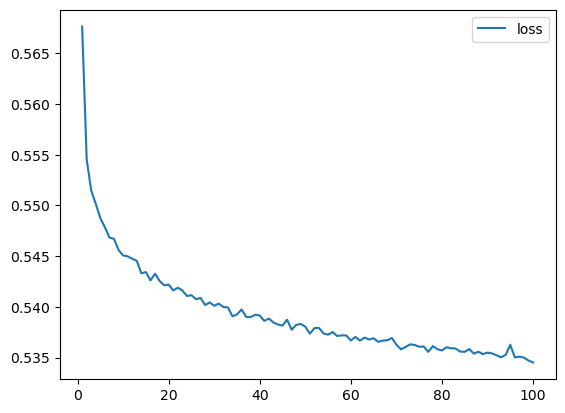

In [35]:

import matplotlib.pyplot as plt


####################################################################################################
####################################################################################################
####################################################################################################
####################################################################################################import matplotlib.pyplot as plt

# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")
plt.show()


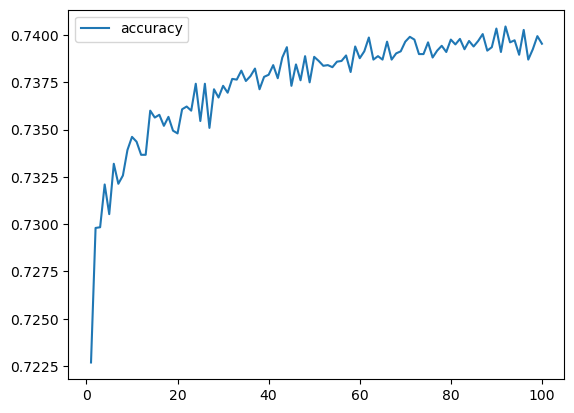

In [36]:
# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

####################################################################################################
####################################################################################################
####################################################################################################
####################################################################################################





In [37]:
# Evaluate the model using the test data

model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


# 8575/8575 - 0s - loss: 0.5578 - acc: 0.7263
# Loss: 0.557812534073699, Accuracy: 0.7262973785400391


215/215 - 0s - loss: 0.5612 - accuracy: 0.7276 - 352ms/epoch - 2ms/step
Loss: 0.561162531375885, Accuracy: 0.7275510430335999


In [38]:
# Export our model to HDF5 file
#  YOUR CODE GOES HERE

# model.save("my_model.h5")

from datetime import datetime

# Get the current date and time in the desired format
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Create the file name with the timestamp
file_name = f"{timestamp}_my_model.h5"

# Save the model with the timestamped file name
# model.save(file_name)
nn.save(file_name)

print(f"Saved Model to HDF5 file\n----------------------------\n{file_name}\n")

print("\nDirectory Listing\n-----------------------------------")
# print("\nDirectory Listing\n-------------------")
!dir {file_name}


Saved Model to HDF5 file
----------------------------
20240826_182244_my_model.h5


Directory Listing
-----------------------------------
 Volume in drive C is OS
 Volume Serial Number is 1E32-783E

 Directory of C:\Users\XR User 1\MY_GIT_WORK_AREA\BOOTCAMPCONTENT\UofM-VIRT-DATA-PT-03-2024-U-LOLC\MY_PROJECTS\deep-learning-challenge

08/26/2024  06:22 PM           104,032 20240826_182244_my_model.h5
               1 File(s)        104,032 bytes
               0 Dir(s)  11,551,199,232 bytes free
